In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install nltk

import nltk

In [ ]:
!pip install svgling
import svgling

In [ ]:
plt.style.use('ggplot')

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('treebank')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
reviews = pd.read_csv('/content/Reviews.csv')

In [ ]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
reviews.shape

(568454, 10)

<Axes: title={'center': 'Review by stars'}, xlabel='Score'>

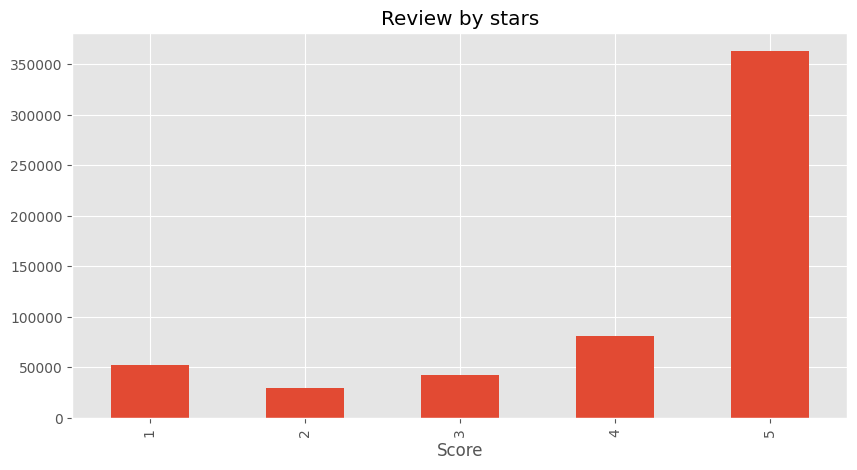

In [ ]:
# quick EDA
reviews['Score'].value_counts().sort_index().plot(kind = 'bar',
                                                  title = 'Review by stars',
                                                  figsize= (10,5))


In [ ]:
reviews = reviews.head(5000)

In [ ]:
reviews.shape

(5000, 10)

In [ ]:
example = reviews['Text'][100]
example

'The mouth says, "How do I love thee, let me count the ways..."<br />If you like apple products a must have item.  The only draw back, shipping cost.  These are very heavy.'

In [ ]:
nltk.word_tokenize(example)

['The',
 'mouth',
 'says',
 ',',
 '``',
 'How',
 'do',
 'I',
 'love',
 'thee',
 ',',
 'let',
 'me',
 'count',
 'the',
 'ways',
 '...',
 "''",
 '<',
 'br',
 '/',
 '>',
 'If',
 'you',
 'like',
 'apple',
 'products',
 'a',
 'must',
 'have',
 'item',
 '.',
 'The',
 'only',
 'draw',
 'back',
 ',',
 'shipping',
 'cost',
 '.',
 'These',
 'are',
 'very',
 'heavy',
 '.']

In [ ]:
tags = nltk.pos_tag(nltk.word_tokenize(example))
tags

[('The', 'DT'),
 ('mouth', 'NN'),
 ('says', 'VBZ'),
 (',', ','),
 ('``', '``'),
 ('How', 'WRB'),
 ('do', 'VB'),
 ('I', 'PRP'),
 ('love', 'VB'),
 ('thee', 'NN'),
 (',', ','),
 ('let', 'VB'),
 ('me', 'PRP'),
 ('count', 'VB'),
 ('the', 'DT'),
 ('ways', 'NNS'),
 ('...', ':'),
 ("''", "''"),
 ('<', 'VBZ'),
 ('br', 'NN'),
 ('/', 'NNP'),
 ('>', 'NNP'),
 ('If', 'IN'),
 ('you', 'PRP'),
 ('like', 'VBP'),
 ('apple', 'NN'),
 ('products', 'NNS'),
 ('a', 'DT'),
 ('must', 'MD'),
 ('have', 'VB'),
 ('item', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('only', 'JJ'),
 ('draw', 'NN'),
 ('back', 'RB'),
 (',', ','),
 ('shipping', 'VBG'),
 ('cost', 'NN'),
 ('.', '.'),
 ('These', 'DT'),
 ('are', 'VBP'),
 ('very', 'RB'),
 ('heavy', 'JJ'),
 ('.', '.')]

In [ ]:
entities = nltk.chunk.ne_chunk(tags)
entities.pprint()

(S
  The/DT
  mouth/NN
  says/VBZ
  ,/,
  ``/``
  How/WRB
  do/VB
  I/PRP
  love/VB
  thee/NN
  ,/,
  let/VB
  me/PRP
  count/VB
  the/DT
  ways/NNS
  .../:
  ''/''
  </VBZ
  br/NN
  //NNP
  >/NNP
  If/IN
  you/PRP
  like/VBP
  apple/NN
  products/NNS
  a/DT
  must/MD
  have/VB
  item/NN
  ./.
  The/DT
  only/JJ
  draw/NN
  back/RB
  ,/,
  shipping/VBG
  cost/NN
  ./.
  These/DT
  are/VBP
  very/RB
  heavy/JJ
  ./.)


In [ ]:
# VADER = Valence Aware Dictionary sEntiment Reasoner
# doesn't account for relationship between words

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()


In [ ]:
# sample usecase
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [ ]:
sia.polarity_scores('i am so frustrated')

{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5709}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.7717}

In [ ]:
# running the polarity score through the entire dataset

result = {}

for i, row in tqdm(reviews.iterrows(), total = len(reviews)):
  text = row['Text']
  text_id = row['Id']
  result[text_id] = sia.polarity_scores(text)


  0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
result

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [ ]:
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns = {'index': 'Id'})
vaders = vaders.merge(reviews, how = 'left')

In [ ]:
vaders.head() # contains sentiment score and the metadata

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


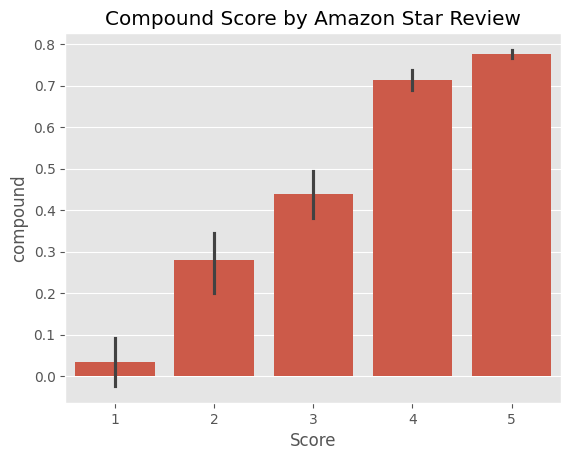

In [ ]:
chart = sns.barplot(data=vaders, x='Score', y='compound')
chart.set_title('Compound Score by Amazon Star Review')
plt.show()

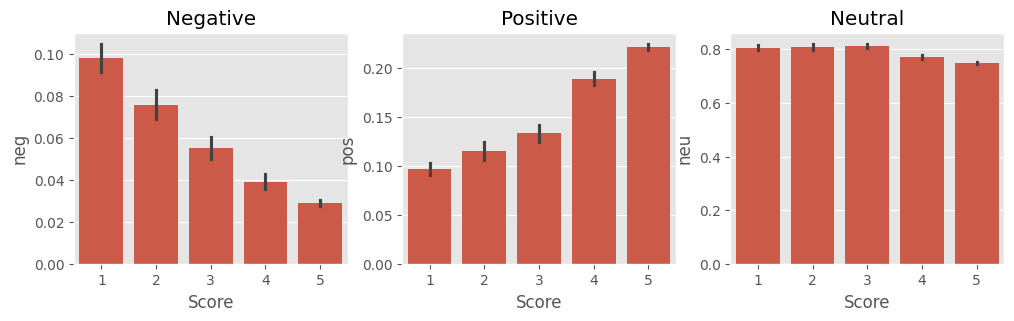

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(12,3))
sns.barplot(data=vaders, x='Score', y='neg', ax=axes[0])
sns.barplot(data=vaders, x='Score', y='pos', ax=axes[1])
sns.barplot(data=vaders, x='Score', y='neu', ax=axes[2])
axes[0].set_title('Negative')
axes[1].set_title('Positive')
axes[2].set_title('Neutral')
plt.show()

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [ ]:
print(example)

The mouth says, "How do I love thee, let me count the ways..."<br />If you like apple products a must have item.  The only draw back, shipping cost.  These are very heavy.


In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.7717}

In [ ]:
# running the roberta model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

In [ ]:
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}

print(scores_dict)

{'roberta_neg': 0.089244366, 'roberta_neu': 0.19628914, 'roberta_pos': 0.30800036}


In [ ]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()

  scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
  }

  return scores_dict


In [ ]:
res = {}
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/5000 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (611 > 512). Running this sequence through the model will result in indexing errors


Broke for id 83
Broke for id 187
Broke for id 371
Broke for id 529
Broke for id 540
Broke for id 603
Broke for id 746
Broke for id 863
Broke for id 866
Broke for id 1017
Broke for id 1053
Broke for id 1070
Broke for id 1156
Broke for id 1165
Broke for id 1220
Broke for id 1321
Broke for id 1375
Broke for id 1498
Broke for id 1575
Broke for id 1796
Broke for id 1826
Broke for id 1854
Broke for id 2169
Broke for id 2248
Broke for id 2476
Broke for id 2480
Broke for id 2492
Broke for id 2584
Broke for id 2610
Broke for id 2897
Broke for id 2898
Broke for id 2902
Broke for id 2928
Broke for id 2942
Broke for id 2944
Broke for id 2947
Broke for id 2948
Broke for id 2990
Broke for id 3014
Broke for id 3022
Broke for id 3023
Broke for id 3025
Broke for id 3183
Broke for id 3306
Broke for id 3415
Broke for id 3788
Broke for id 3969
Broke for id 4037
Broke for id 4107
Broke for id 4110
Broke for id 4254
Broke for id 4307
Broke for id 4316
Broke for id 4408
Broke for id 4483
Broke for id 4512
Br

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns = {'index': 'Id'})
results_df = results_df.merge(reviews, how = 'left')

In [ ]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,-3.281482,-2.425750,-0.294133,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,1.866287,1.181409,0.427585,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,-2.736928,-2.402826,-1.003695,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,-1.601705,-1.060229,-0.198064,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,-2.958612,-2.583524,-0.775914,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

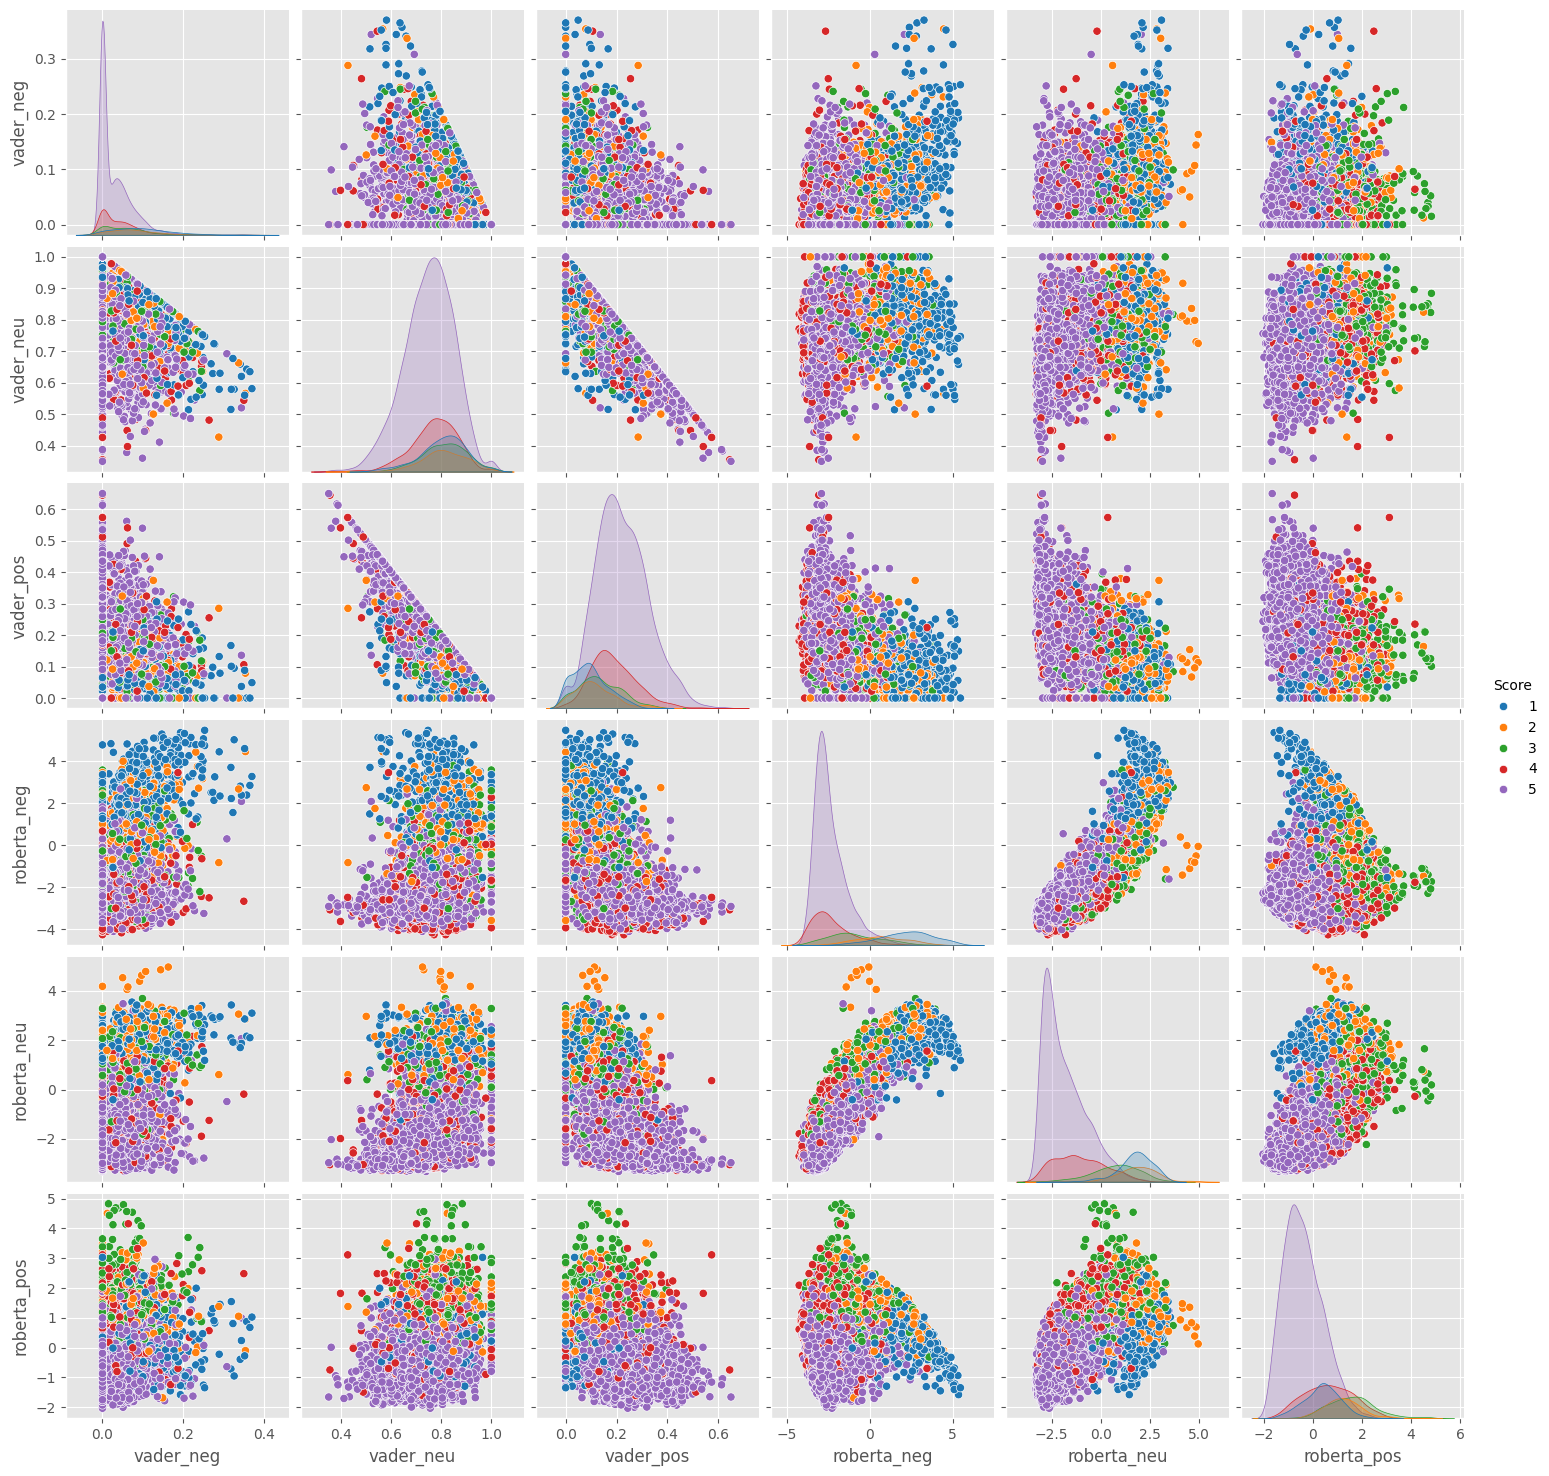

In [ ]:
sns.pairplot(data = results_df,
             vars = ['vader_neg', 'vader_neu', 'vader_pos',
                     'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue = 'Score',
             palette = 'tab10'
             )

plt.show()

In [ ]:
results_df.query('Score == 1').sort_values('roberta_pos', ascending = False)['Text'].values[0]

"I guess it does the job okay.  And it's much cheaper than 5-Hour brand.  But the packaging it arrived in was in Spanish.  Since I don't speak or read Spanish I was a little leery of this item since it was impossible for me to read ingredients and nutritional information panel.<br />The item is labelled as being made in the USA but the website on the label has a .mx extension for being a Mexican company.<br />I don't have anything against our neighbors to the south.  I just expect that when I buy something on Amazon that the labeling will be in English unless otherwise stated."

In [ ]:
results_df.query('Score == 1').sort_values('vader_pos', ascending = False)['Text'].values[0]

"Second ingredient is SUGAR! Need I say more? Make your own bisquit mix, it's super easy!"

In [ ]:
results_df.query('Score == 5').sort_values('roberta_neg', ascending = False)['Text'].values[0]

"I found it so hard to believe anyone could give this mix 1 star, I had to read those reviews. Two of them seem like ads for Robs Red Mill, and the other one didn't make any sense. You must be looking for pancakes or waffles, so do yourself a favor and give these a go. They are delicious"

In [ ]:
results_df.query('Score == 5').sort_values('vader_neg', ascending = False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'